In [2]:
!pip3 install networkx
!pip3 install matplotlib
!pip3 install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.7 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 145.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 150.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 140.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 KB 156.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 113.4 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy

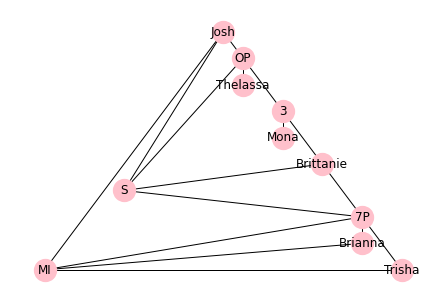

In [53]:
graph = nx.Graph()

graph.add_edges_from(
    [
        ("MI","7P"),("7P","S"),("S","OP"),("OP","3"),
        ("MI","Josh"), ("MI","Trisha"), ("MI","Brianna"),
        ("7P","Trisha"), ("7P","Brianna"), ("7P","Brittanie"),
        ("S","Josh"), ("S","Brittanie"),
        ("OP","Thelassa"),("OP","Josh"),
        ("3","Brittanie"),("3","Mona")
    ]
)
options = {
    "node_size": 300,
    "node_color": "pink",
    "linewidths": 6,
    "width": 1
}

nx.draw_planar(graph, **options, with_labels=True)
ax = plt.gca()
plt.axis("off")
plt.show()

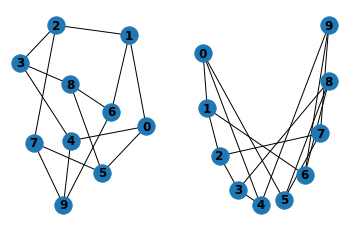

In [30]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 9), range(17)], with_labels=True, font_weight='bold')

options = {
    'node_color': 'purple',
    'node_size': 200,
    'width': 1,
}


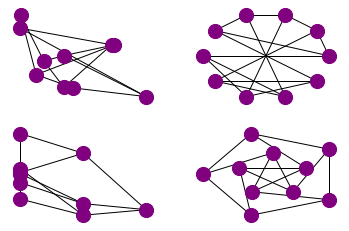

In [28]:

subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

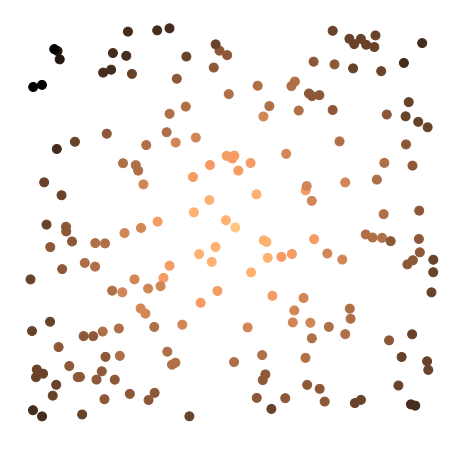

In [94]:
# Use seed when creating the graph for reproducibility
G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color="white", width=1)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.copper_r,
)
plt.figure(1,figsize=(2,1))
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()